In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns
import warnings

In [5]:
df = pd.read_csv("C:/Users/User/Downloads/houses_to_rent_v2.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [7]:
df.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [8]:
df.rename(columns={'hoa (R$)':'hoa','parking spaces':'parking_spaces', 'floor': 'floors',
                   'rent amount (R$)' : 'rent_amount',
                   'property tax (R$)' : 'property_tax',
                   'fire insurance (R$)' : 'fire_insurance',
                   'total (R$)' : 'total'}, inplace = True)

In [9]:
def m_data(data):
    m_data = df.isnull().sum() 
    total = m_data.sort_values(ascending=True) 
    percent = (m_data / len(df.index)*100).round(2).sort_values(ascending=True)
    m_table = pd.concat([total, percent], axis=1, keys=['Qty DA', '% DA'])
    return m_table.tail(13)

In [10]:
m_data(df)

,Qty DA,% DA
city,0,0.0
area,0,0.0
rooms,0,0.0
bathroom,0,0.0
parking_spaces,0,0.0
floors,0,0.0
animal,0,0.0
furniture,0,0.0
hoa,0,0.0
rent_amount,0,0.0


In [11]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking_spaces', 'floors',
       'animal', 'furniture', 'hoa', 'rent_amount', 'property_tax',
       'fire_insurance', 'total'],
      dtype='object')

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
area,10692.0,149.217920,537.016942,11.0,56.00,90.0,182.0,46335.0
rooms,10692.0,2.506079,1.171266,1.0,2.00,2.0,3.0,13.0
bathroom,10692.0,2.236813,1.407198,1.0,1.00,2.0,3.0,10.0
parking_spaces,10692.0,1.609147,1.589521,0.0,0.00,1.0,2.0,12.0
hoa,10692.0,1174.021698,15592.305248,0.0,170.00,560.0,1237.5,1117000.0
rent_amount,10692.0,3896.247194,3408.545518,450.0,1530.00,2661.0,5000.0,45000.0
property_tax,10692.0,366.704358,3107.832321,0.0,38.00,125.0,375.0,313700.0
fire_insurance,10692.0,53.300879,47.768031,3.0,21.00,36.0,68.0,677.0
total,10692.0,5490.487000,16484.725912,499.0,2061.75,3581.5,6768.0,1120000.0


# Şehir İstatistikleri


In [13]:
df.city.unique()

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

<Figure size 432x288 with 0 Axes>

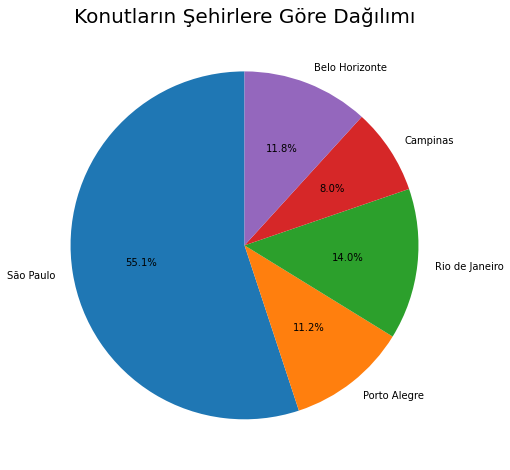

In [14]:
sp = df.city.value_counts()['São Paulo']
pa = df.city.value_counts()['Porto Alegre']
rj = df.city.value_counts()['Rio de Janeiro']
cp = df.city.value_counts()['Campinas']
bh = df.city.value_counts()['Belo Horizonte']
cities = [sp, pa, rj, cp, bh]
fig = plt.figure() 
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("Konutların Şehirlere Göre Dağılımı",fontsize=20)
labels='São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas','Belo Horizonte'
ax.pie(cities, labels=labels, autopct='%1.1f%%',startangle=90)
plt.show()

# Alan istatistikleri

In [15]:
df.area.describe()

count    10692.000000
mean       149.217920
std        537.016942
min         11.000000
25%         56.000000
50%         90.000000
75%        182.000000
max      46335.000000
Name: area, dtype: float64

### standart sapma 537 ve ortalama değer 149 iken, max değerimizin 46,335 olması veriyi etkileyeceği ve modelimizin anlamlılığını düşüreceği için 10000 ve üstünü aykırı değer olarak sınıflandırıp veri setimizden çıkartıyoruz.

In [67]:
df = df.query('area<1100')
df.shape

(10662, 13)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


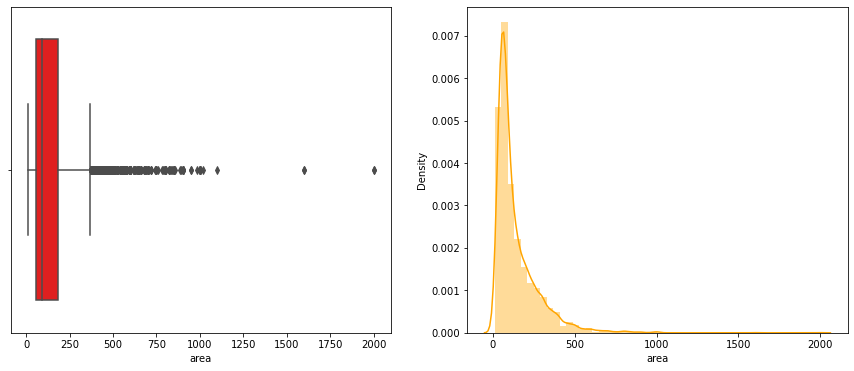

In [38]:
plt.figure(1, figsize=(15,6))
plt.subplot(1, 2, 1)
sns.boxplot(df.area,color='red')
plt.subplot(1, 2, 2)
sns.distplot(df.area,color='orange')
plt.show()

In [39]:
maior_1000 = df.query('area>1000')
maior_1000
#1000 ve üstü sadece 6 veri olduğu için onları çıkartacağız.

,city,area,rooms,bathroom,parking_spaces,floors,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
654,São Paulo,1600,6,6,6,-,acept,furnished,0,7600,1834,115,9549
2423,Belo Horizonte,1020,5,4,6,-,acept,furnished,0,6520,654,107,7281
3559,São Paulo,1100,4,6,10,-,acept,not furnished,3000,14000,2000,211,19210
4813,São Paulo,1600,4,5,12,-,acept,not furnished,1,6900,5000,104,12010
5129,Belo Horizonte,2000,4,2,3,-,acept,not furnished,0,4956,200,82,5238
8790,Belo Horizonte,2000,3,3,2,2,acept,furnished,3000,5000,200,67,8267


In [40]:
df = df.query('area<1100')
df.shape

(10684, 13)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


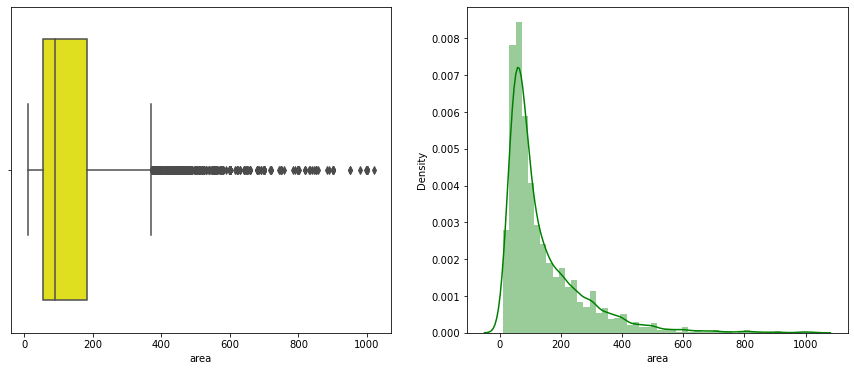

In [41]:
plt.figure(1, figsize=(15,6))
plt.subplot(1, 2, 1)
sns.boxplot(df.area,color='yellow')
plt.subplot(1, 2, 2)
sns.distplot(df.area,color='green')
plt.show()

In [42]:
df.area.describe()

count    10684.000000
mean       140.721172
std        130.101529
min         11.000000
25%         56.000000
50%         90.000000
75%        182.000000
max       1020.000000
Name: area, dtype: float64

# Oda sayısı istatistikleri

In [43]:
df.rooms.describe()

count    10684.000000
mean         2.504867
std          1.170591
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         13.000000
Name: rooms, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


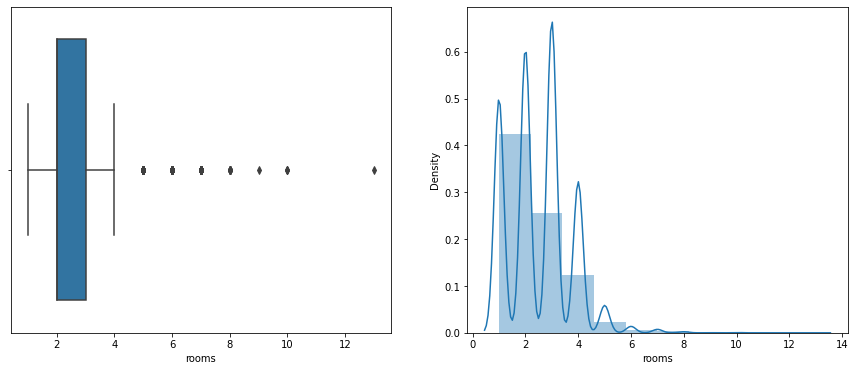

In [44]:
plt.figure(1, figsize=(15,6))
plt.subplot(1, 2, 1)
sns.boxplot(df.rooms)
plt.subplot(1, 2, 2)
sns.distplot(df.rooms,bins = 10)
plt.show()

In [45]:
# 4 oda sayısı ve üstü olan değerler aykırı değer olarak bakabikiriz.

In [46]:
df.query('rooms>4')

,city,area,rooms,bathroom,parking_spaces,floors,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
20,São Paulo,100,7,4,0,-,acept,not furnished,0,3800,118,58,3976
143,Campinas,999,5,7,8,-,acept,not furnished,0,14000,667,211,14880
148,São Paulo,500,5,4,6,-,acept,not furnished,0,13000,250,196,13450
169,São Paulo,320,8,4,0,-,acept,not furnished,450,10500,350,158,11460
207,Rio de Janeiro,258,5,6,0,-,acept,not furnished,0,8700,670,133,9503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10587,Belo Horizonte,500,8,5,8,-,acept,not furnished,0,5000,150,82,5232
10590,Belo Horizonte,350,5,2,7,-,acept,furnished,0,9000,602,148,9750
10593,São Paulo,340,5,6,5,7,not acept,furnished,4800,8000,2100,102,15000
10599,Belo Horizonte,180,6,4,6,-,acept,not furnished,0,5500,209,91,5800


In [47]:
# 406 tane obs olduğu için veri setinde tutabiliriz.

In [48]:
df.rooms.value_counts()

3     3267
2     2975
1     2454
4     1582
5      287
6       67
7       36
8       11
10       3
13       1
9        1
Name: rooms, dtype: int64

<Figure size 432x288 with 0 Axes>

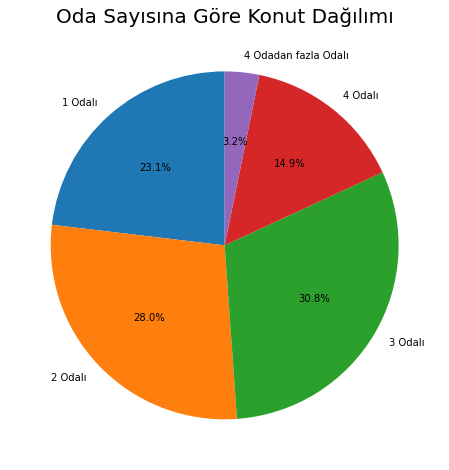

In [51]:
r1 = df.rooms.value_counts()[1]
r2 = df.rooms.value_counts()[2]
r3 = df.rooms.value_counts()[3]
r4 = df.rooms.value_counts()[4]
r_5 = df.rooms.value_counts()[5]+[6]+[7]+[8]+[9]+[10]+[13]
rooms = [r1,r2,r3,r4,r_5]
fig = plt.figure() 
fig, ax1 = plt.subplots(figsize=(8,8))
ax1.set_title("Oda Sayısına Göre Konut Dağılımı",fontsize=20)
labels='1 Odalı', '2 Odalı', '3 Odalı','4 Odalı','4 Odadan fazla Odalı',
ax1.pie(rooms,labels=labels, autopct='%1.1f%%',startangle=90)
plt.show()

# Banyo sayısı İstatistikleri

In [52]:
df.bathroom.describe()

count    10684.000000
mean         2.235118
std          1.405296
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: bathroom, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


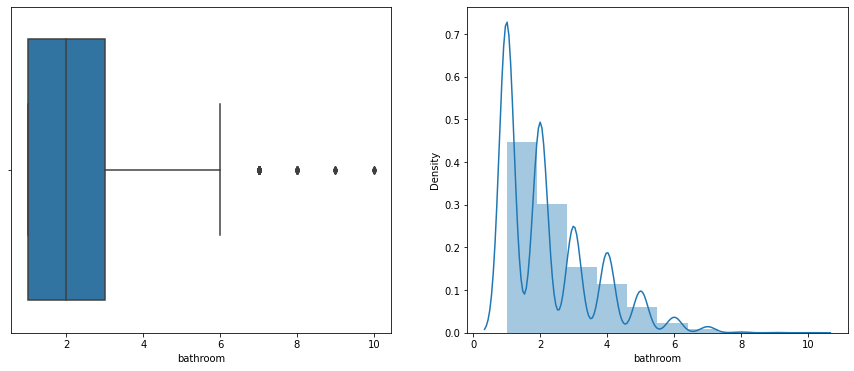

In [16]:
plt.figure(1, figsize=(15,6))
plt.subplot(1, 2, 1)
sns.boxplot(df.bathroom)
plt.subplot(1, 2, 2)
sns.distplot(df.bathroom,bins = 10)
plt.show()

In [17]:
df.query(' bathroom>6')

,city,area,rooms,bathroom,parking_spaces,floors,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
143,Campinas,999,5,7,8,-,acept,not furnished,0,14000,667,211,14880
421,São Paulo,900,4,9,8,1,acept,not furnished,0,15000,5700,226,20930
534,Belo Horizonte,548,4,7,6,17,acept,not furnished,5905,15000,2484,200,23590
640,Belo Horizonte,1000,5,7,8,-,acept,not furnished,0,14980,1904,246,17130
718,São Paulo,500,4,7,3,-,acept,not furnished,0,15000,2500,226,17730
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10256,Belo Horizonte,460,5,8,5,-,not acept,not furnished,0,7320,0,121,7441
10318,São Paulo,353,5,7,5,12,acept,not furnished,4800,10000,1917,127,16840
10380,Campinas,800,4,7,4,-,acept,not furnished,2100,15000,1898,226,19220
10476,Porto Alegre,600,5,7,5,-,acept,not furnished,0,7000,834,125,7959


In [18]:
df. bathroom.value_counts()

1     4301
2     2910
3     1474
4     1111
5      578
6      215
7       85
8       11
9        4
10       3
Name: bathroom, dtype: int64

<Figure size 432x288 with 0 Axes>

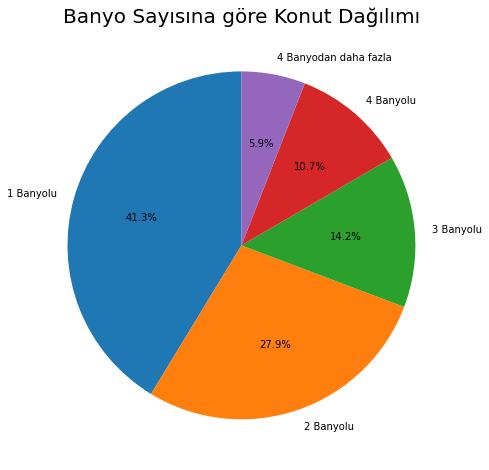

In [19]:
broom1 = df.bathroom.value_counts()[1]
broom2 = df.bathroom.value_counts()[2]
broom3 = df.bathroom.value_counts()[3]
broom4 = df.bathroom.value_counts()[4]
broom_5 = df.bathroom.value_counts()[5]+[6]+[7]+[8]+[9]+[10]
brooms = [broom1,broom2,broom3,broom4,broom_5]
fig = plt.figure() 
fig, ax1 = plt.subplots(figsize=(8,8))
ax1.set_title("Banyo Sayısına göre Konut Dağılımı",fontsize=20)
labels='1 Banyolu', '2 Banyolu', '3 Banyolu','4 Banyolu','4 Banyodan daha fazla'
ax1.pie(brooms,labels=labels, autopct='%1.1f%%',startangle=90)
plt.show()

# Park Alanı İstatistikleri

In [20]:
df['parking_spaces'].describe()

count    10692.000000
mean         1.609147
std          1.589521
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         12.000000
Name: parking_spaces, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


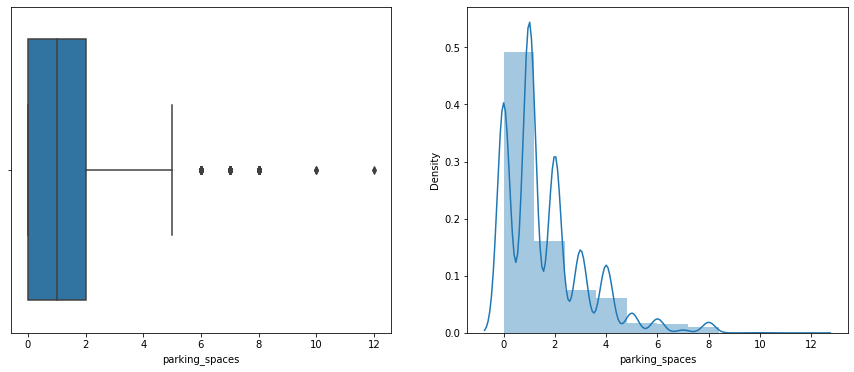

In [21]:
plt.figure(1, figsize=(15,6))
plt.subplot(1, 2, 1)
sns.boxplot(df.parking_spaces)
plt.subplot(1, 2, 2)
sns.distplot(df.parking_spaces,bins = 10)
plt.show()

In [22]:
df.query('parking_spaces> 5')

,city,area,rooms,bathroom,parking_spaces,floors,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
5,São Paulo,376,3,3,7,-,acept,not furnished,0,8000,834,121,8955
15,Campinas,330,4,6,6,-,acept,furnished,680,8000,328,121,9129
19,São Paulo,600,4,5,6,-,acept,not furnished,0,12000,9500,181,21680
131,São Paulo,900,4,6,8,-,acept,not furnished,0,15000,4417,226,19640
143,Campinas,999,5,7,8,-,acept,not furnished,0,14000,667,211,14880
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10558,São Paulo,320,3,5,8,-,not acept,not furnished,0,9000,567,136,9703
10587,Belo Horizonte,500,8,5,8,-,acept,not furnished,0,5000,150,82,5232
10590,Belo Horizonte,350,5,2,7,-,acept,furnished,0,9000,602,148,9750
10599,Belo Horizonte,180,6,4,6,-,acept,not furnished,0,5500,209,91,5800


In [23]:
df.parking_spaces.value_counts()

1     3630
0     2683
2     2070
3      968
4      789
5      230
6      163
8      123
7       33
10       2
12       1
Name: parking_spaces, dtype: int64

<Figure size 432x288 with 0 Axes>

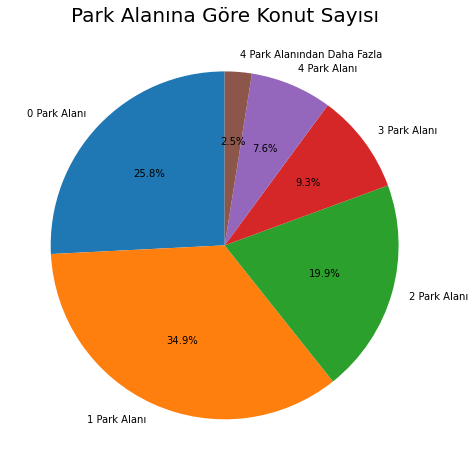

In [24]:
ps0 = df.parking_spaces.value_counts()[0]
ps1 = df.parking_spaces.value_counts()[1]
ps2 = df.parking_spaces.value_counts()[2]
ps3 = df.parking_spaces.value_counts()[3]
ps4 = df.parking_spaces.value_counts()[4]
ps_5 = df.parking_spaces.value_counts()[5]+[6]+[7]+[8]+[10]
pspace = [ps0,ps1,ps2,ps3,ps4,ps_5]
fig = plt.figure() 
fig, ax1 = plt.subplots(figsize=(8,8))
ax1.set_title("Park Alanına Göre Konut Sayısı",fontsize=20)
labels='0 Park Alanı','1 Park Alanı', '2 Park Alanı', '3 Park Alanı','4 Park Alanı','4 Park Alanından Daha Fazla',
ax1.pie(pspace,labels=labels, autopct='%1.1f%%',startangle=90)
plt.show()

In [25]:
df.floors.unique()

array(['7', '20', '6', '2', '1', '-', '4', '3', '10', '11', '24', '9',
       '8', '17', '18', '5', '13', '15', '16', '14', '26', '12', '21',
       '19', '22', '27', '23', '35', '25', '46', '28', '29', '301', '51',
       '32'], dtype=object)

In [26]:
df.floors = df.floors.replace('-','0')

In [27]:
df.floors.unique()

array(['7', '20', '6', '2', '1', '0', '4', '3', '10', '11', '24', '9',
       '8', '17', '18', '5', '13', '15', '16', '14', '26', '12', '21',
       '19', '22', '27', '23', '35', '25', '46', '28', '29', '301', '51',
       '32'], dtype=object)

In [28]:
df.floors = df.floors.astype(int)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            10692 non-null  object
 1   area            10692 non-null  int64 
 2   rooms           10692 non-null  int64 
 3   bathroom        10692 non-null  int64 
 4   parking_spaces  10692 non-null  int64 
 5   floors          10692 non-null  int32 
 6   animal          10692 non-null  object
 7   furniture       10692 non-null  object
 8   hoa             10692 non-null  int64 
 9   rent_amount     10692 non-null  int64 
 10  property_tax    10692 non-null  int64 
 11  fire_insurance  10692 non-null  int64 
 12  total           10692 non-null  int64 
dtypes: int32(1), int64(9), object(3)
memory usage: 1.0+ MB


In [30]:
df.floors.describe()

count    10692.000000
mean         5.067995
std          6.069050
min          0.000000
25%          1.000000
50%          3.000000
75%          8.000000
max        301.000000
Name: floors, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


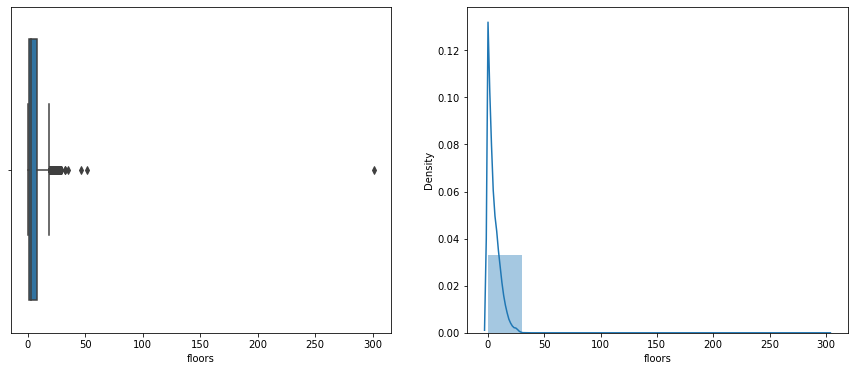

In [31]:
plt.figure(1, figsize=(15,6))
plt.subplot(1, 2, 1)
sns.boxplot(df.floors)
plt.subplot(1, 2, 2)
sns.distplot(df.floors,bins = 10)
plt.show()

In [32]:
df.query('floors>300')

,city,area,rooms,bathroom,parking_spaces,floors,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
2562,Belo Horizonte,80,3,2,2,301,acept,not furnished,750,2600,164,35,3549


In [33]:
df.floors = df.floors.replace(301,3)

In [34]:
df.floors.value_counts()

0     2461
1     1081
2      985
3      932
4      748
5      600
6      539
7      497
8      490
9      369
10     357
11     303
12     257
13     200
14     170
15     147
16     109
17      96
18      75
19      53
20      44
21      42
23      25
25      25
22      24
26      20
24      19
27       8
28       6
29       5
32       2
51       1
46       1
35       1
Name: floors, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


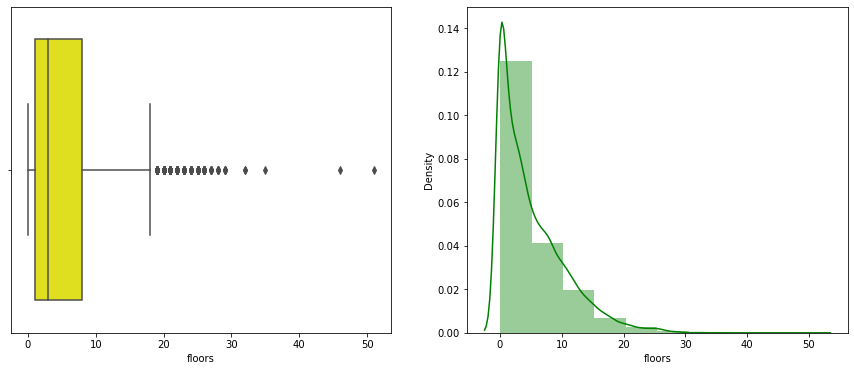

In [35]:
plt.figure(1, figsize=(15,6))
plt.subplot(1, 2, 1)
sns.boxplot(df.floors,color='yellow')
plt.subplot(1, 2, 2)
sns.distplot(df.floors,bins = 10,color='green')
plt.show()

<Figure size 432x288 with 0 Axes>

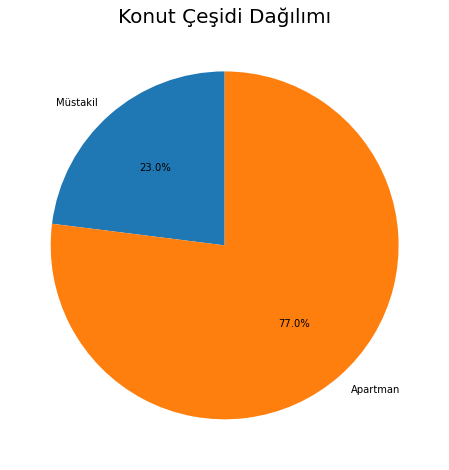

In [37]:
house = df.floors.value_counts()[0]
apart = len(df)-house
tp = [house,apart]
fig = plt.figure() 
fig, ax1 = plt.subplots(figsize=(8,8))
ax1.set_title("Konut Çeşidi Dağılımı",fontsize=20)
labels='Müstakil','Apartman'
ax1.pie(tp,labels=labels, autopct='%1.1f%%',startangle=90)
plt.show()

# Eşyalı-Eşyasız ve Evcil Hayvanlara izin verilip verilmeyen Evler

In [38]:
df.animal.unique()

array(['acept', 'not acept'], dtype=object)

In [39]:
df.furniture.unique()

array(['furnished', 'not furnished'], dtype=object)

In [42]:
df.animal = df.animal.replace('true','1')
df.animal = df.animal.replace('false','0')
df.animal.unique()

array(['1', '0'], dtype=object)

In [43]:
df.furniture = df.furniture.replace('true','1')
df.furniture = df.furniture.replace('false','0')
df.furniture.unique()

array(['1', '0'], dtype=object)

In [44]:
df.animal = df["animal"].astype(int)

In [45]:
df.furniture = df["furniture"].astype(int)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            10692 non-null  object
 1   area            10692 non-null  int64 
 2   rooms           10692 non-null  int64 
 3   bathroom        10692 non-null  int64 
 4   parking_spaces  10692 non-null  int64 
 5   floors          10692 non-null  int32 
 6   animal          10692 non-null  int32 
 7   furniture       10692 non-null  int32 
 8   hoa             10692 non-null  int64 
 9   rent_amount     10692 non-null  int64 
 10  property_tax    10692 non-null  int64 
 11  fire_insurance  10692 non-null  int64 
 12  total           10692 non-null  int64 
dtypes: int32(3), int64(9), object(1)
memory usage: 960.7+ KB


# Vergi İstatistikleri

In [52]:
df.property_tax.describe()

count     10692.000000
mean        366.704358
std        3107.832321
min           0.000000
25%          38.000000
50%         125.000000
75%         375.000000
max      313700.000000
Name: property_tax, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


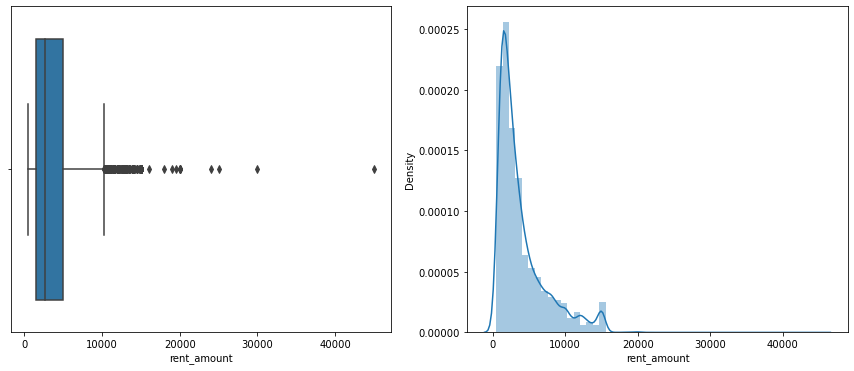

In [54]:
plt.figure(1, figsize=(15,6))
plt.subplot(1, 2, 1)
sns.boxplot(df.rent_amount)
plt.subplot(1, 2, 2)
sns.distplot(df.rent_amount)
plt.show()


In [65]:
df.query('rent_amount>20000')
df = df.query('rent_amount<20000')
df = df.query('hoa<10000')

In [63]:
df = df.query('property_tax< 20000')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


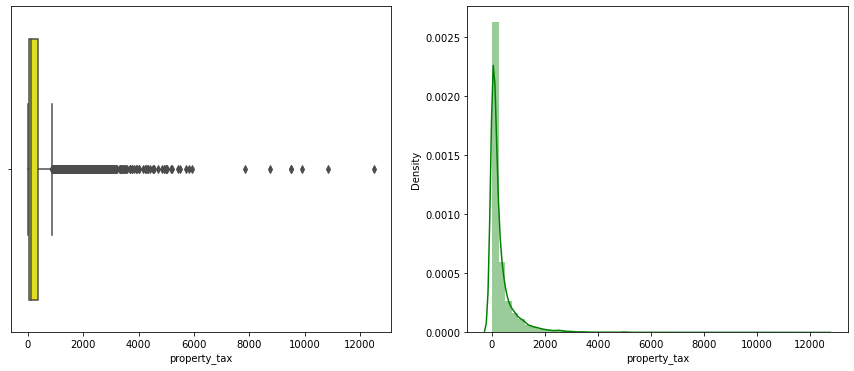

In [59]:
plt.figure(1, figsize=(15,6))
plt.subplot(1, 2, 1)
sns.boxplot(df.property_tax,color='yellow')
plt.subplot(1, 2, 2)
sns.distplot(df.property_tax,color='green')
plt.show()

# Yangın Sigortası İstatistikleri

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


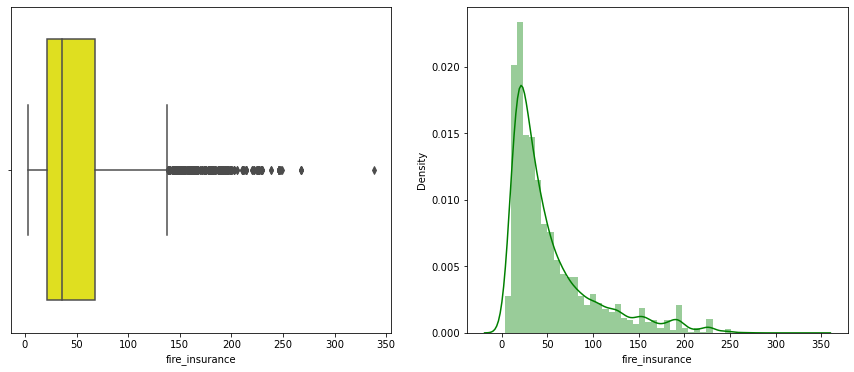

In [60]:
plt.figure(1, figsize=(15,6))
plt.subplot(1, 2, 1)
sns.boxplot(df.fire_insurance,color='yellow')
plt.subplot(1, 2, 2)
sns.distplot(df.fire_insurance,color='green')
plt.show()

# Korelasyon


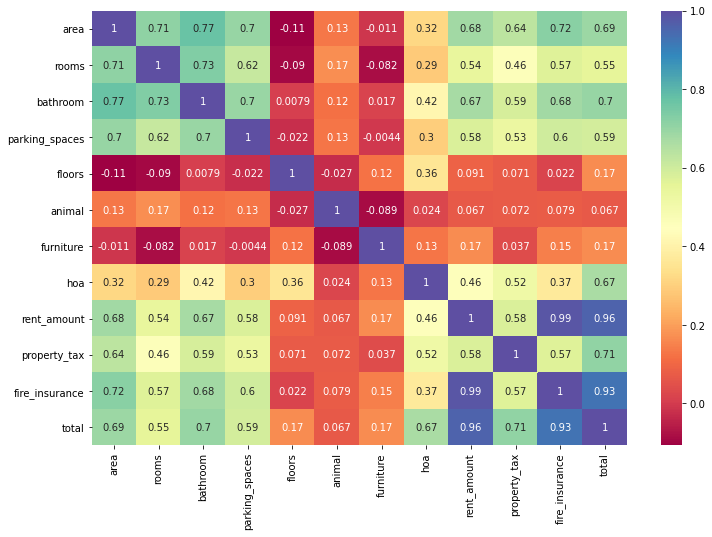

In [68]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="Spectral")
plt.show()

In [72]:
df.groupby('city')['total'].mean().sort_values(ascending = False)

city
São Paulo         6196.910672
Belo Horizonte    4533.798883
Rio de Janeiro    4532.587725
Campinas          3174.164319
Porto Alegre      2964.816275
Name: total, dtype: float64

In [73]:
df.head(6)

,city,area,rooms,bathroom,parking_spaces,floors,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,1,0,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,1,0,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,0,0,0,800,25,11,836
5,São Paulo,376,3,3,7,0,1,0,0,8000,834,121,8955


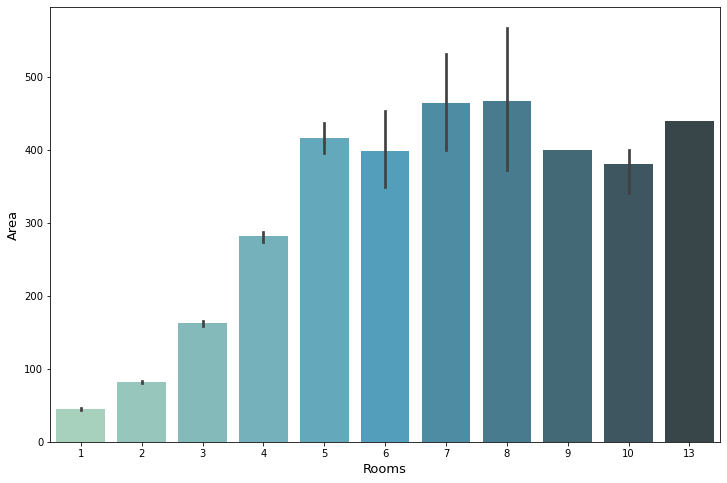

In [74]:
ax = sns.barplot(x='rooms', y='area', data = df, 
palette = 'GnBu_d')
ax.figure.set_size_inches(12, 8)
ax.set_xlabel('Rooms', fontsize=13)
ax.set_ylabel('Area', fontsize=13)
plt.show()

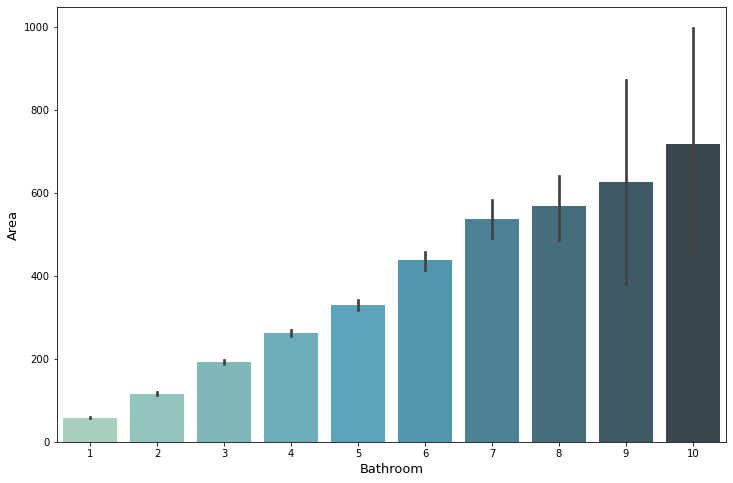

In [75]:
ax = sns.barplot(x='bathroom', y='area', data = df, 
palette = 'GnBu_d')
ax.figure.set_size_inches(12, 8)
ax.set_xlabel('Bathroom', fontsize=13)
ax.set_ylabel('Area', fontsize=13)
plt.show()

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
from sklearn.preprocessing import MinMaxScaler

In [79]:
y = df["total"]

In [86]:
X = df.drop(["total","city"],axis=1) 

scaler = MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
lm = LinearRegression()

In [90]:
lm.fit(X_train,y_train)

LinearRegression()

In [91]:
pred = lm.predict(X_test)

<AxesSubplot:xlabel='total'>

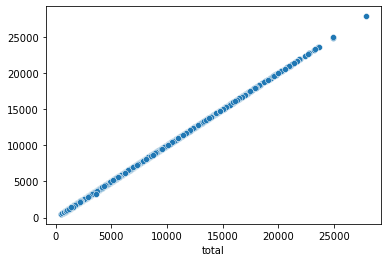

In [92]:
sns.scatterplot(x=y_test,y=pred)

In [94]:
from sklearn import metrics

In [99]:
print("MeanAE",metrics.mean_absolute_error(y_test,pred))
print("MeanSE",metrics.mean_squared_error(y_test,pred))
print("RMSR",np.sqrt(metrics.mean_squared_error(y_test,pred)))

MeanAE 0.6696788334081509
MeanSE 49.733815836083174
RMSR 7.0522206315516796


In [100]:
#note : Veri temizlemeden önce değerler; 1,82,9